# 引入模組

In [1]:
# 引入 numpy、pd 和 sklearn(scikit-learn) 模組
import numpy as np
import pandas as pd
from sklearn import datasets
# 引入 train_test_split 分割方法，
# 注意在 sklearn v0.18 後 train_test_split 從 sklearn.cross_validation 子模組搬到 sklearn.model_selection 中
from sklearn.model_selection import train_test_split
# 引入 KNeighbors 模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# 2. 引入資料集(load)並進行探索性資料分析(Exploratory data analysis)

In [2]:
# 引入 iris 資料集
raw_iris = datasets.load_iris()

# 探索性分析：了解資料集內容
# 先印出 key 值，列出有哪些值：['data', 'target', 'target_names', 'DESCR', 'feature_names']
# ‘data’, the data to learn -- X
# ‘target’, the classification labels -- y 分類標籤(目標值)
# ‘target_names’, the meaning of the labels -- 分類的標籤名稱
# ‘feature_names’, the meaning of the features -- 特徵
# ‘DESCR’, the full description of the dataset -- 資料及內容描述
print(raw_iris.keys())

# 印出 feature 值
# print(raw_iris['data'])

# 印出目標值，分別對應的是三種花的類別：['setosa 山鳶尾' 'versicolor 變色鳶尾' 'virginica 維吉尼亞鳶尾']
# print(raw_iris['target'])

# 印出目標標籤，三種花的類別：['setosa' 'versicolor' 'virginica']
# print(raw_iris['target_names'])

# 印出屬性名稱，
# ['sepal length 花萼長度 (cm)', 'sepal width 花萼寬度 (cm)', 'petal length 花蕊/花瓣長度 (cm)', 'petal width 花蕊寬度 (cm)']
# print(raw_iris['feature_names'])

# 印出資料集內容描述
print(raw_iris['DESCR'])

# 類別種類
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html
# https://www.tutorialspoint.com/numpy/numpy_unique.htm
print(np.unique(raw_iris.target))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

#### 將資料轉成 dataFrame

In [3]:
# 將資料轉為 pandas DataFrame
# data 為觀察目標變數
df_X = pd.DataFrame(raw_iris.data)

# target 為預測變數
df_y = pd.DataFrame(raw_iris.target)

df = pd.merge(df_X, df_y, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'sepal length (cm)', 1: 'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)','0_y':'target_names'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## 敘述性統計
['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 相關性分析

In [5]:
corr = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()


https://seaborn.pydata.org/generated/seaborn.heatmap.html

AttributeError: module 'seaborn' has no attribute 'plt'

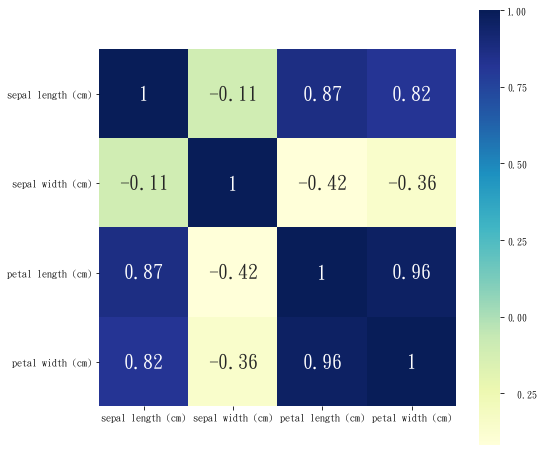

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu", annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)

sns.plt.show()

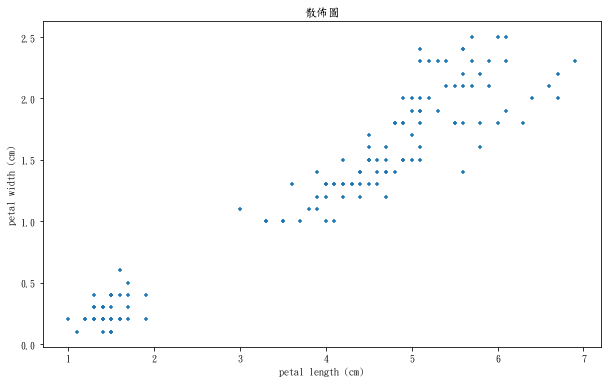

In [7]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x=2,y=3,marker='+')

# 3. 資料預處理與特徵工程 (Data Clean/Preprocessing & Feature Engineering)
良好的資料輸入 取決於資料預處理與特徵工程，

而好的輸入 將大大影響到模型是否可以發揮其理論正常水準。

以下把資料轉成 DataFrame 格式方便進行操作。

真正在進行機器學習工作流程的時候資料預處理往往是最花時間的部份。

同時為了方便模型的校調，我們這邊把資料集分為 70% 訓練資料，30% 驗證資料。

#### 資料切割

In [8]:
# 將資料切分為 training data 和 testing data，

# 其中 random_state 若設為 0 或不設則即便實例不同但因種子相同產生同樣隨機編號，若設為 1 則每次隨機產生不同編號
# test_size 為切分 training data 和 testing data 的比例
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df[['target_names']], test_size=0.3)

#### 資料標準化

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 4. 訓練模型與校調 (Model Training)
1. 樣本資料是否大於 50 筆：範例資料集總共有 150 筆資料，大於 50
2. 是否為分類問題：Iris 花朵類別預測是多類別分類問題
3. 是否有標籤好的資料：已經有 label 資料
4. 樣本資料是否小於 100K：資料小於 100K
5. 選擇 Linear SVC 模型（第一個選擇的模型）
6. 是否是文字資料：不是
7. 選擇 KNeighborsClassifier 模型（第二個選擇的模型）
8. 後續優化 / SVC / Ensemble

### PCA n=4

In [11]:
from sklearn.decomposition import PCA

In [12]:
X_pca = df.drop('target_names',axis=1)
y_pca = df['target_names']
X_pca.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


In [13]:
pca = PCA(n_components=4)
pca.fit(X_pca)
X_pca = pca.transform(X_pca)
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [14]:
pca.explained_variance_

array([ 4.22484077,  0.24224357,  0.07852391,  0.02368303])

In [15]:
X_pca

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02],
       [ -2.27989736e+00,   7.47782713e-01,   1.74325619e-01,
         -2.71468037e-02],
       [ -2.82089068e+00,  -8.21045110e-02,   2.64251085e-01,
         -5.00996251e-02],
       [ -2.62648199e+00,   1.70405349e-01,  -1.58015103e-02,
         -4.62817610e-02],
       [ -2.88795857e+00,  -5.70798026e-01,   2.73354061e-02,
         -2.66154143e-02],
       [ -2.67384469e+00,  -1.06691704e-01,  -1.91533300e-01,
         -5.58909660e-02],
       [ -2.50652679e+00,   6.51935014e-01,  -6.92749958e-02,
         -1.66082478e-02],
       [ -2.61314272e

In [16]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

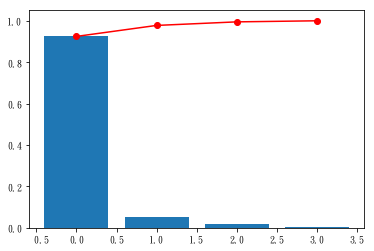

In [17]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

In [18]:
type(X_pca)

numpy.ndarray

In [22]:
pd.DataFrame(X_pca).corr()

,0,1,2,3
0,1.000000e+00,6.466766e-16,-2.367385e-16,1.696027e-16
1,6.466766e-16,1.000000e+00,-1.002844e-15,-1.758431e-16
2,-2.367385e-16,-1.002844e-15,1.000000e+00,5.680285e-16
3,1.696027e-16,-1.758431e-16,5.680285e-16,1.000000e+00


## PCA n=2

In [10]:
X_pca2 = df.drop('target_names',axis=1)
y_pca2 = df['target_names']

In [13]:
pca2 = PCA(n_components=2)
pca2.fit(X_pca2)
X_pca2 = pca2.transform(X_pca2)
pca2.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

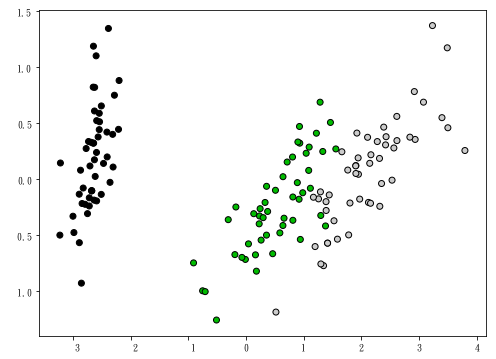

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_pca2, cmap=plt.cm.spectral, edgecolor='k')
plt.show()

### 將PCA資料切割 + 標準化

In [15]:
from sklearn.preprocessing import StandardScaler
X_pca2_train, X_pca2_test, y_pca2_train, y_pca2_test = train_test_split(X_pca2, y_pca2, test_size = 0.3)

In [16]:
sc = StandardScaler()
sc.fit(X_pca2_train)
X_pca2_train_std = sc.transform(X_pca2_train)
X_pca2_test_std = sc.transform(X_pca2_test)

#### Linear SVC 模型（第一個選擇的模型）

沒有標準化的 結果比 標準化後的好

#### PCA + 資料標準化 + LinearSVC

In [17]:
# from sklearn.svm import LinearSVC
lin_svc_pca2 = LinearSVC()
lin_svc_pca2.fit(X_pca2_train_std, y_pca2_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
type(X_pca2_train_std)

numpy.ndarray

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_pca2_test.values.ravel(), lin_svc_pca2.predict(X_pca2_test_std)))
print(metrics.confusion_matrix(y_pca2_test.values.ravel(), lin_svc_pca2.predict(X_pca2_test_std)))
# print(metrics.classification_report(y_pca_test.values.ravel(), lin_svc.predict(X_pca_test)))
# print(metrics.confusion_matrix(y_pca_test.values.ravel(), lin_svc.predict(X_pca_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.87      0.93      0.90        14
          2       0.93      0.88      0.90        16

avg / total       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 13  1]
 [ 0  2 14]]


In [22]:
print('各變項參數:', lin_svc_pca2.coef_)
print("MSE: %.2f" % np.mean((lin_svc_pca2.predict(X_pca2_test_std) - y_pca2_test.values.ravel()) ** 2))
print("R Square:",lin_svc_pca2.score(X_pca2_test_std,y_pca2_test))

各變項參數: [[-1.40809442  0.39591152]
 [ 0.22662649 -0.37109501]
 [ 2.83141758 -0.40458732]]
MSE: 0.07
R Square: 0.933333333333


In [23]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [61]:
y_pca2.values.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.learning_curve import learning_curve

cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = LinearSVC()

train_sizes, train_scores, valid_scores = learning_curve(estimator, X_pca2_train_std, y_pca2_train.values.ravel(), train_sizes=np.linspace(0.2, 1.0, 5), cv = 10)
# plot_learning_curve(estimator, "LinserSVC+PCA+Std", sc.transform(X_pca2), y_pca2.values.ravel(), cv = kf, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\poduo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

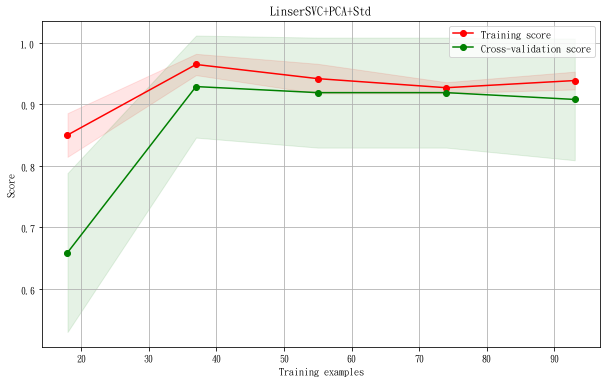

In [79]:
plot_learning_curve(estimator, "LinserSVC+PCA+Std", X_pca2_train_std, y_pca2_train.values.ravel(), cv = 10, train_sizes=np.linspace(0.2, 1.0, 5))

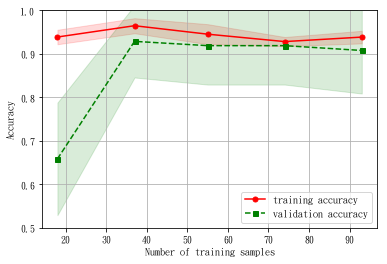

In [66]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('sc',StandardScaler()),('linSVC',LinearSVC())])
train_sizes, train_scores, test_scores = learning_curve(estimator= pipe_lr,
                                                        X = X_pca2_train,
                                                        y = y_pca2_train,
                                                        train_sizes = np.linspace(0.2, 1.0, 5),
                                                        cv = 10
                                                       )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'red', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'red')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.5, 1.0])
plt.show()


#### PCA + 資料 沒有 標準化 + LinearSVC

In [75]:
lin_svc_pca = LinearSVC()
lin_svc_pca.fit(X_pca2_train, y_pca2_train)
# lin_svc_pca.fit(X_pca_train, y_pca_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [76]:
from sklearn import metrics
print(metrics.classification_report(y_pca2_test.values.ravel(), lin_svc_pca.predict(X_pca2_test)))
print(metrics.confusion_matrix(y_pca2_test.values.ravel(), lin_svc_pca.predict(X_pca2_test)))
# print(metrics.classification_report(y_pca_test.values.ravel(), lin_svc.predict(X_pca_test)))
# print(metrics.confusion_matrix(y_pca_test.values.ravel(), lin_svc.predict(X_pca_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.87      0.93      0.90        14
          2       0.93      0.88      0.90        16

avg / total       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 13  1]
 [ 0  2 14]]


In [77]:
print('各變項參數:', lin_svc_pca.coef_)
print("MSE: %.2f" % np.mean((lin_svc_pca.predict(X_pca2_test) - y_pca2_test.values.ravel()) ** 2))
print("R Square:",lin_svc_pca.score(X_pca2_test,y_pca2_test))

各變項參數: [[-0.72687954  0.63919343]
 [ 0.10772716 -0.78859588]
 [ 1.6412638  -0.95269972]]
MSE: 0.07
R Square: 0.933333333333


In [104]:
# from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.learning_curve import learning_curve

# cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = LinearSVC()

train_sizes, train_scores, valid_scores = learning_curve(estimator, X_pca2_train, y_pca2_train.values.ravel(), train_sizes=np.linspace(0.2, 1.0, 5), cv = 10)
# plot_learning_curve(estimator, "LinserSVC+PCA+Std", sc.transform(X_pca2), y_pca2.values.ravel(), cv = kf, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\poduo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

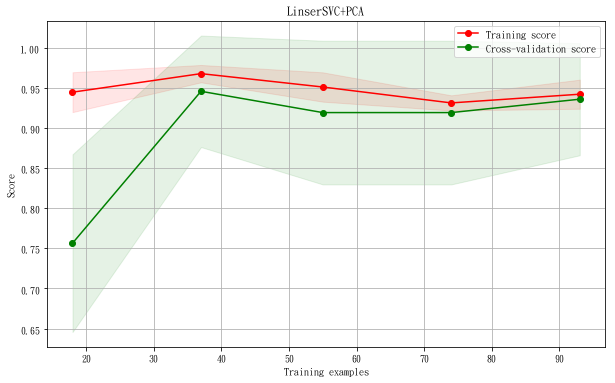

In [81]:
plot_learning_curve(estimator, "LinserSVC+PCA", X_pca2_train, y_pca2_train.values.ravel(), cv = 10, train_sizes=np.linspace(0.2, 1.0, 5))

#### 資料 沒有 標準化 + LinearSVC

In [25]:
# 初始化 LinearSVC 實例
lin_svc = LinearSVC()
# 使用 fit 來建置模型，其參數接收 training data matrix, testing data array，所以進行 y_train.values.ravel() Data Frame 轉換
# y_train.values.ravel()
lin_svc.fit(X_train, y_train.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test.values.ravel(), lin_svc.predict(X_test)))
print(metrics.confusion_matrix(y_test.values.ravel(), lin_svc.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.87      1.00      0.93        13
          2       1.00      0.88      0.93        16

avg / total       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 13  0]
 [ 0  2 14]]


In [27]:
print('截距：', lin_svc.intercept_)
print('各變項參數:', lin_svc.coef_)
print("MSE: %.2f" % np.mean((lin_svc.predict(X_test) - y_test.values.ravel()) ** 2))
print("R Square:",lin_svc.score(X_test,y_test))

截距： [ 0.10956117  1.25204449 -0.93021881]
各變項參數: [[ 0.18424299  0.45123007 -0.80793762 -0.45070939]
 [-0.10316163 -0.60875633  0.61556498 -1.1814235 ]
 [-0.80389044 -1.06882634  1.09715269  2.10340272]]
MSE: 0.04
R Square: 0.955555555556


In [40]:
y = df_y.values.ravel()

In [42]:
X = df_X.as_matrix()

In [43]:
# 產生一個和y一樣大小的 nparray
indices = np.arange(df_y.shape[0])
# 打亂 indices 的內容
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [73]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.learning_curve import learning_curve

cv2 = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = LinearSVC()

train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.2, 1.0, 5), cv = 10)

<module 'matplotlib.pyplot' from 'C:\\Users\\poduo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

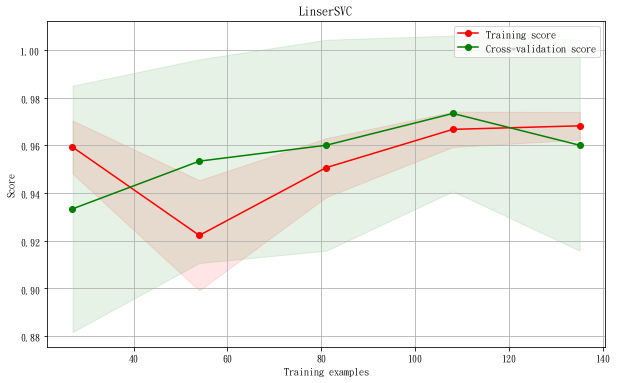

In [74]:
plot_learning_curve(estimator, "LinserSVC", X, y, cv = 10, train_sizes=np.linspace(0.2, 1.0, 5))

#### 資料 標準化 + LinearSVC

In [82]:
y = df_y.values.ravel()

In [83]:
X = df_X.as_matrix()

In [84]:
# 產生一個和y一樣大小的 nparray
indices = np.arange(df_y.shape[0])
# 打亂 indices 的內容
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc2 = StandardScaler()
X_train_std = sc2.fit_transform(X_train)
X_test_std = sc2.transform(X_test)

In [88]:
# 初始化 LinearSVC 實例
lin_svc_st = LinearSVC()
# 使用 fit 來建置模型，其參數接收 training data matrix, testing data array，所以進行 y_train.values.ravel() Data Frame 轉換
# y_train.values.ravel()
lin_svc_st.fit(X_train_std, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [89]:
print(metrics.classification_report(y_test, lin_svc_st.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, lin_svc_st.predict(X_test_std)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        19
          1       0.85      0.79      0.81        14
          2       0.79      0.92      0.85        12

avg / total       0.89      0.89      0.89        45

[[18  1  0]
 [ 0 11  3]
 [ 0  1 11]]


In [90]:
print('各變項參數:', lin_svc_st.coef_)
print("MSE: %.2f" % np.mean((lin_svc_st.predict(X_test_std) - y_test) ** 2))
print("R Square:",lin_svc_st.score(X_test_std,y_test))

各變項參數: [[-0.12166394  0.47745253 -0.57540228 -0.60608077]
 [ 0.24063447 -0.52995352  0.24244129 -0.54048766]
 [-0.37244491 -0.2535759   1.65091275  1.61675714]]
MSE: 0.11
R Square: 0.888888888889


In [101]:
estimator = LinearSVC()
cv = KFold(n_splits=4, random_state=None, shuffle=True)
sc3 = StandardScaler()
sc3.fit(X_train)
train_sizes, train_scores, valid_scores = learning_curve(estimator, sc3.transform(X), y, train_sizes=np.linspace(0.2, 1.0, 5), cv = 10)
# plot_learning_curve(estimator, "LinserSVC+PCA+Std", sc.transform(X_pca2), y_pca2.values.ravel(), cv = kf, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\poduo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

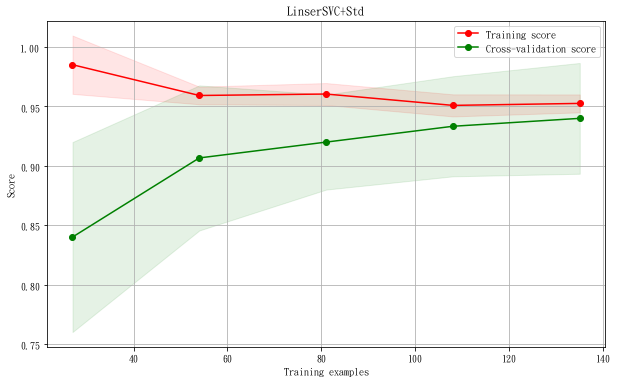

In [102]:
plot_learning_curve(estimator, "LinserSVC+Std",  sc3.transform(X), y, train_sizes=np.linspace(0.2, 1.0, 5), cv = 10)

### 2個feature ：sepal length (cm)、sepal width (cm)

In [55]:
X1 = df[['sepal length (cm)','sepal width (cm)']]
y1 = df['target_names']

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

In [57]:
sc1 = StandardScaler()
sc1.fit(X1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
X1_train_std = sc1.transform(X1_train)
X1_test_std = sc1.transform(X1_test)

In [59]:
lin_svc1 = LinearSVC()
lin_svc1.fit(X1_train_std, y1_train.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [60]:
print(metrics.classification_report(y1_test.values.ravel(), lin_svc1.predict(X1_test_std)))
print(metrics.confusion_matrix(y1_test.values.ravel(), lin_svc1.predict(X1_test_std)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.73      0.69      0.71        16
          2       0.71      0.75      0.73        16

avg / total       0.80      0.80      0.80        45

[[13  0  0]
 [ 0 11  5]
 [ 0  4 12]]


## 學習曲線

#### KNeighborsClassifier 模型（第二個選擇的模型）+ 無 標準化

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
print(metrics.classification_report(y_test, knn.predict(X_test)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.83      1.00      0.91        10
          2       1.00      0.90      0.95        20

avg / total       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 10  0]
 [ 0  2 18]]


#### KNeighborsClassifier 模型（第二個選擇的模型）+ 有標準化

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std)))

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.71      1.00      0.83        10
          2       1.00      0.85      0.92        20

avg / total       0.94      0.91      0.92        45

[[14  1  0]
 [ 0 10  0]
 [ 0  3 17]]


#### PCA+KNN + 資料無標準化

In [63]:
knn_pca = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_pca.fit(X_pca2_train, y_pca2_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [65]:
print(metrics.classification_report(y_pca2_test, knn_pca.predict(X_pca2_test)))
print(metrics.confusion_matrix(y_pca2_test, knn_pca.predict(X_pca2_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        16
          2       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 16  0]
 [ 0  1 13]]


#### PCA + KNN + 資料 有 標準化

In [68]:
knn_pca = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_pca.fit(X_pca2_train_std, y_pca2_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
print(metrics.classification_report(y_pca2_test, knn_pca.predict(X_pca2_test_std)))
print(metrics.confusion_matrix(y_pca2_test, knn_pca.predict(X_pca2_test_std)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        16
          2       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 16  0]
 [ 0  1 13]]


#### 後續優化 / SVC / Ensemble